Calculation and visualisation of the crude death rate, the age-specific death rates and the age-standardized death rate per 100,000 for all ages in both the United States and Uganda in 2019.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Function to create back to back comparative bar charts
def back_to_back_bar_charts(df, graph0_title, graph1_title, yaxis_title, bar_label):

    hfont = {'fontname':'Calibri'}
    facecolor = '#eaeaf2'
    index = df.index
    column0 = df.iloc[:, 1]
    column1 = df.iloc[:, 0]
    # Figure and subplots
    fig, axes = plt.subplots(figsize=(14,6), facecolor=facecolor, ncols=2, sharey=True)
    fig.tight_layout()

    # Bars and titles
    axes[0].barh(index, column0, color='r')
    axes[0].set_title(graph0_title, fontsize=16, pad=15, color='r', **hfont)
    axes[1].barh(index, column1, color='b')
    axes[1].set_title(graph1_title, fontsize=16, pad=15, color='b', **hfont)
    axes[0].set_ylabel(yaxis_title, fontsize=16, color='k', **hfont )

    # Invert the axis of 1 of the subplots
    axes[0].invert_xaxis() 


    for i,v in enumerate(column0):
        axes[0].text(v +bar_label, i - .25, str(v), 
            color = 'k', fontweight = 'bold')
    for i,v in enumerate(column1):
            axes[1].text(v +3, i - .25, str(v), 
            color = 'k', fontweight = 'bold')
    
    for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
        label.set(fontsize=16, color='k', **hfont)
    for label in (axes[1].get_xticklabels()):
        label.set(fontsize=16, color='k', **hfont)

    plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [78]:
# Create a dataframe with the U.N. estimated number of death by single age in thousands.
death_num_df = pd.read_csv("total_deaths_UG-USA.csv", sep=",")
death_num_df = death_num_df.iloc[:2, 11:]
death_num_df.index = ['UG','US']
print(death_num_df)

# Create a dataframe with the WHO standard world population
WHO_world_std = pd.read_csv("WHO_standard.csv", sep=",")
WHO_world_std = WHO_world_std.dropna()
print()
print(WHO_world_std)

# Create a dataframe with the U.N. eatimated population number by 5 year age groups in thousands.
population_df = pd.read_csv("Population.csv")
population_df = population_df.iloc[:2, 11:]
population_df.index = ['UG','US']
print()
print(population_df)

        0     1     2     3     4     5     6     7     8     9  ...     91  \
UG  53.05  7.71  4.71  3.17  2.27  1.70  1.42  1.24  1.09  0.99  ...   0.30   
US  20.88  1.50  0.94  0.71  0.57  0.53  0.49  0.45  0.44  0.47  ...  56.86   

       92     93     94     95     96     97     98     99   100+  
UG   0.23   0.17   0.12   0.09   0.06   0.04   0.03   0.03   0.05  
US  54.40  46.82  39.13  38.03  32.55  23.68  19.13  14.65  30.03  

[2 rows x 101 columns]

           age group   0-4   5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
0  World average (%)  8.86  8.69    8.6   8.47   8.22   7.93   7.61   7.15   

   40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84    85+  
0   6.59   6.04   5.37   4.55   3.72   2.96   2.21   1.52   0.91  0.635  

      0-4    5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  ...  \
UG   7329   6614   5899   5151   4348   3500   2619   1903   1504   1235  ...   
US  19849  20697  22092  21895  21872  23407  22842  22297  20695

In [79]:
# Calculate total deaths and total population from the U.N. estimates
total_death_df= death_num_df.sum(axis=1)
print(total_death_df)
total_pop_df = population_df.sum(axis=1)
print(total_pop_df)

UG     249.92
US    2778.24
dtype: float64
UG     42949
US    334321
dtype: int64


In [80]:
# Function to calculate crude death rate
def crude_death_rate (death_num, population_num ):
    crude_death_rate = (death_num / population_num)*100000
    return crude_death_rate

A crude rate represents the unadjusted rate of a health outcome prior to any application of age standardization. This entails taking the number of deaths for each year and dividing it by the population of the country.

In [81]:
# Crude death rate dataframe
crude_death_rate_df = round(crude_death_rate(total_death_df, total_pop_df), 1)
print(f" According to U.N. estimates, the 2019 crude death rate in Uganda was: {crude_death_rate_df['UG']} per 100,000.")
print(f" According to U.N. estimates, the 2019 crude death rate in USA was: {crude_death_rate_df['US']} per 100,000.")

 According to U.N. estimates, the 2019 crude death rate in Uganda was: 581.9 per 100,000.
 According to U.N. estimates, the 2019 crude death rate in USA was: 831.0 per 100,000.


While a crude rate isn't inherently inaccurate, it may yield a biased portrayal of the situation. Comparing death rates between Uganda and the US might lead one to infer that the US exhibits a higher incidence of fatalities.

However, drawing such conclusions based solely on crude rates is problematic, as disparities in death rates could stem from the US's larger proportion of elderly individuals compared to Uganda.

For a more precise comparison it becomes imperative to apply age standardization, thereby adjusting these rates to a standard population.

Age standardization entails a three-step process.

1- Initially, the U.N. death estimates are used to calculate the age specific crude death rates.

2- Subsequently, these rates are multiplied by the proportion of the corresponding age group in the standard population.

3- After multiplying all age-specific rates by the corresponding proportion of each age group in the standard population, we sum the rates to obtain the age standardised death rates.

These age-standardized rates enable a comparison of death rates between Uganda and the US as if both countries possessed identical age structures.

In [82]:
# Create a age group dataframe for the deaths in 2019

# Define the starting column index and the step size
start_column = 0
step_size = 5

# Calculate the ending column index (80-84)
end_column = len(death_num_df.columns)- 16
# Create an empty list to store the sums
sums = []

# Iterate over the columns in steps of 5
for i in range(start_column, end_column , step_size):
    # Calculate the sum of columns in the current range and append to the list
    column_range = range(i, min(i + step_size, end_column))
    column_sum = death_num_df.iloc[:, column_range].sum(axis=1)
    sums.append(column_sum)
    
# Concatenate the sums along the columns axis to form a DataFrame
death_age_df = pd.concat(sums, axis=1)

# rename the columns 
death_age_df.columns = [f"{i+4// step_size}-{i+4// step_size+4}" for i in range(start_column, end_column, step_size)]

# Add the last age group : 85+
death_age_df["85+"] = death_num_df.iloc[:, end_column:].sum(axis=1)
print(death_age_df)

      0-4   5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  \
UG  70.91  6.44   4.85   7.78  10.46  11.37  11.28  11.09  11.58  12.63   
US  24.60  2.38   3.32  10.68  19.74  26.97  32.84  39.74  46.03  66.54   

     50-54   55-59   60-64   65-69   70-74   75-79   80-84     85+  
UG   13.11   12.65   13.13   14.37   13.79   10.98    8.01    5.49  
US  100.50  162.43  220.92  254.88  294.46  318.60  348.66  804.95  


In [83]:
# Reformat the population dataframe 
population_age_df = population_df.iloc[:, :17]
#print(population_age_df)
age_df = population_df.iloc[:, 17:].sum(axis=1)
population_age_df.insert(17, "85+", age_df, True)
print(population_age_df)

      0-4    5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  \
UG   7329   6614   5899   5151   4348   3500   2619   1903   1504   1235   
US  19849  20697  22092  21895  21872  23407  22842  22297  20695  21244   

    50-54  55-59  60-64  65-69  70-74  75-79  80-84   85+  
UG    953    687    500    353    197     93     44    20  
US  21346  22348  20941  17501  13689   9273   6119  6214  


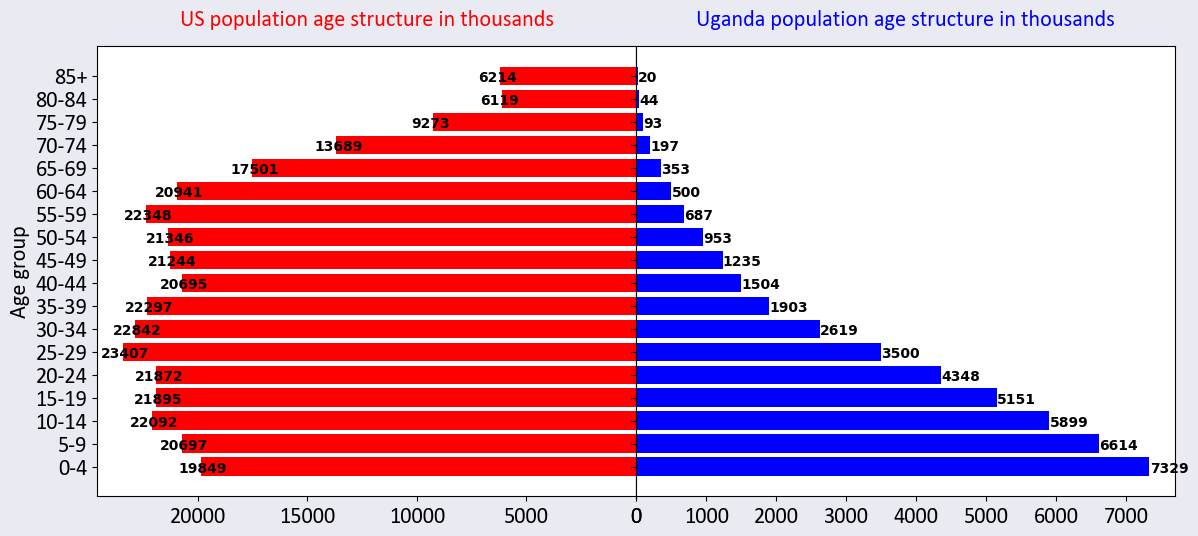

In [84]:
# Chart the age structure of the population of both countries
back_to_back_bar_charts(population_age_df.T,'US population age structure in thousands', 'Uganda population age structure in thousands', 'Age group', 1000)

The population distribution graphs vividly illustrate the differences between the demographic compositions of the two countries. Consequently, the imperative for age standardization becomes evident, as it facilitates a comprehensive comparison of the death rates between these nations.
To conduct age standardization, it's essential to have a reference population known as the "standard population." This serves as the benchmark for adjustments based on age. Various standard populations exist, with some of the most commonly used ones being the World Health Organisation (WHO) World Standard Population and the European Standard Population. Standard populations typically categorize age groups into 5-year intervals, providing the proportion that each age group represents within the standard population.

<function matplotlib.pyplot.show(close=None, block=None)>

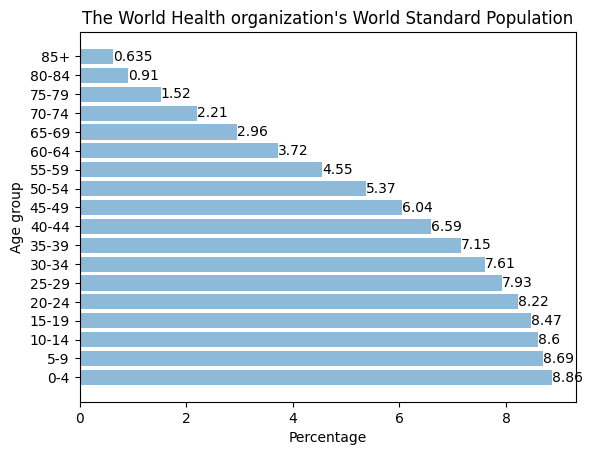

In [85]:
WHO_world_std = WHO_world_std.iloc[:, 1:]
objects = WHO_world_std.T.index
percentage = WHO_world_std.T.iloc[:,0]
fig, ax = plt.subplots()
hbars = ax.barh(objects, percentage, align='center', alpha=0.5)
ax.set_xlabel('Percentage')
ax.set_ylabel('Age group')
ax.set_title('The World Health organization\'s World Standard Population')
ax.bar_label(hbars)
plt.show

In [86]:
# Calculate the age specific crude death rate per 100,000
age_spec_df = round(crude_death_rate(death_age_df,population_age_df), 1)
print(age_spec_df)

      0-4   5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44   45-49  \
UG  967.5  97.4   82.2  151.0  240.6  324.9  430.7  582.8  769.9  1022.7   
US  123.9  11.5   15.0   48.8   90.3  115.2  143.8  178.2  222.4   313.2   

     50-54   55-59   60-64   65-69   70-74    75-79    80-84      85+  
UG  1375.7  1841.3  2626.0  4070.8  7000.0  11806.5  18204.5  27450.0  
US   470.8   726.8  1055.0  1456.4  2151.1   3435.8   5698.0  12953.8  


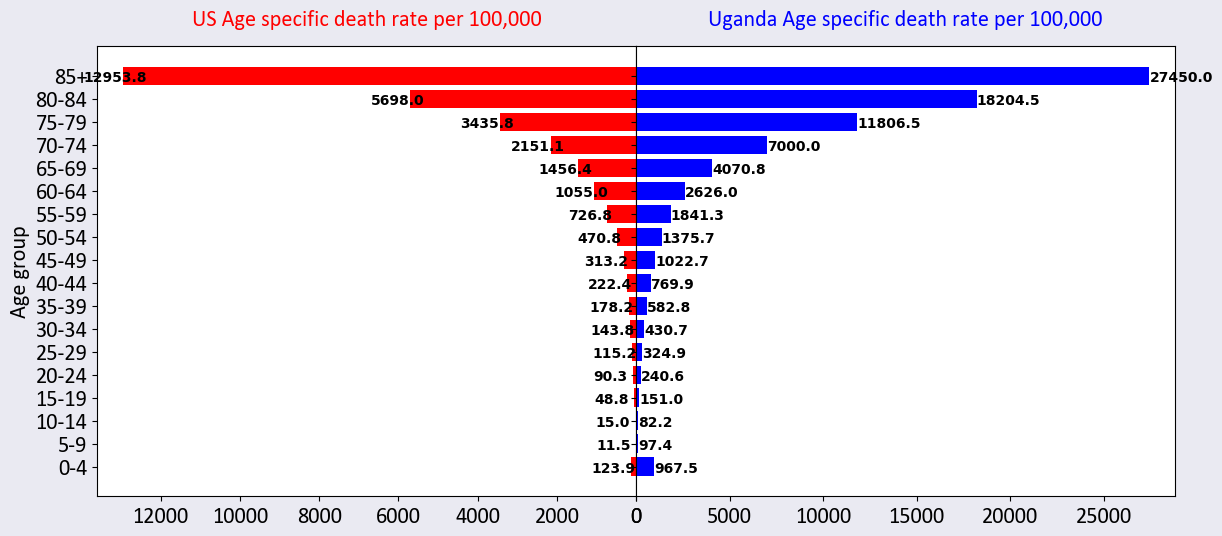

In [88]:
# Chart displaying the age specific death rate per 100,000 
back_to_back_bar_charts(age_spec_df.T, 'US Age specific death rate per 100,000', 'Uganda Age specific death rate per 100,000', 'Age group', 1000 )

In [89]:
# Calculate WHO age standardized death rate

age_std_rate_df = age_spec_df.multiply(WHO_world_std.iloc[0], axis='columns')
sum_age_std_rate_df = age_std_rate_df.sum(axis=1)

UG_age_std_rate = round(sum_age_std_rate_df['UG']/100, 1)
print(f"In 2019 the age standardised death rate in Uganda was: {UG_age_std_rate} per 100,000.")

US_age_std_rate = round(sum_age_std_rate_df['US']/100, 1)
print(f"In 2019 the age standardised death rate in the US was: {US_age_std_rate} per 100,000.")

In 2019 the age standardised death rate in Uganda was: 1396.5 per 100,000.
In 2019 the age standardised death rate in the US was: 465.8 per 100,000.


In [90]:
# Create the crude death rate and age standardised death rate dataframe
Crude_death_rate = [crude_death_rate_df['UG'], crude_death_rate_df['US']]
Age_std_rate = [UG_age_std_rate, US_age_std_rate ]
Death_rate_df = pd.DataFrame(list(zip(Crude_death_rate, Age_std_rate )))
Death_rate_df.columns = ['Crude death rate', 'Age standardised death rate']
Death_rate_df.index = ['Uganda', 'US']
print(Death_rate_df)

        Crude death rate  Age standardised death rate
Uganda             581.9                       1396.5
US                 831.0                        465.8


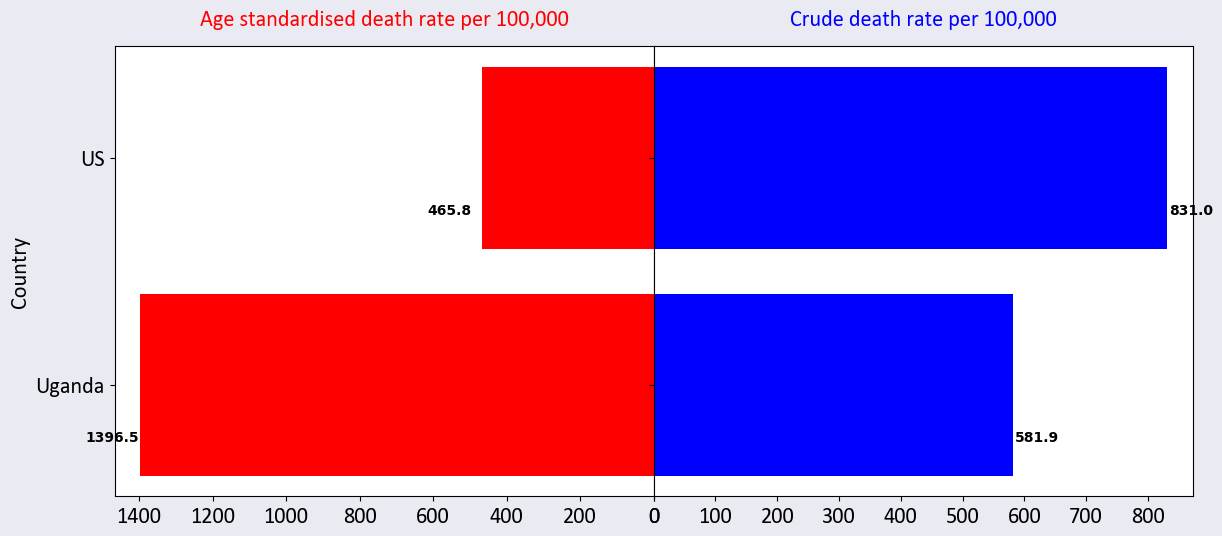

In [91]:
# Plot the crude death rate and the age standardised death rate per 100,000 for each country
back_to_back_bar_charts(Death_rate_df, 'Age standardised death rate per 100,000', 'Crude death rate per 100,000', 'Country', 150 )